In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [113]:
datasets_title = ["US PMI", "China PMI"]

datasets = {}

for title in datasets_title:
    dataset = pd.read_excel("PMI-Data.xlsx", sheet_name=title, skiprows=range(5), usecols='A:B', index_col=0)[::-1]

    dataset["Percent change"] = np.log(dataset["PX_LAST"]/dataset["PX_LAST"].shift(1))

    datasets[title] = dataset

In [114]:
datasets["US PMI"]

,PX_LAST,Percent change
Date,,
2016-04-30,51.3,NaN
2016-05-31,51.4,0.001947
2016-06-30,52.2,0.015444
2016-07-31,52.7,0.009533
2016-08-31,49.8,-0.056600
...,...,...
2022-04-30,55.4,-0.030225
2022-05-31,56.1,0.012556
2022-06-30,53.0,-0.056844


In [128]:
# concatenating the two datasets
df = pd.concat([datasets["US PMI"]["Percent change"], datasets["China PMI"]["Percent change"]], axis=1)
df.columns = ['US PMI', 'China PMI']

#shifting China PMI forward by 3 months
df['China PMI'] = df['China PMI'].shift(3)

#removing empty rows
df = df.dropna()

In [129]:
desc = df.describe()
desc

,US PMI,China PMI
count,76.000000,76.000000
mean,0.000379,0.000053
std,0.039793,0.059652
min,-0.165759,-0.336872
25%,-0.020719,-0.007989
50%,0.000000,-0.001961
75%,0.018486,0.005851
max,0.186146,0.376093


(-0.16575886753325728, 0.1861456532323581)

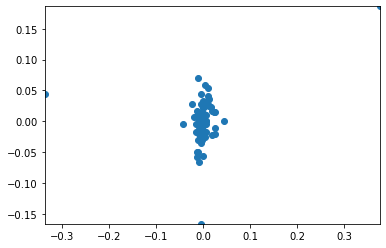

In [141]:
plt.scatter(df['China PMI'], df['US PMI'])

plt.xlim(df['China PMI'].min(), df['China PMI'].max())
plt.ylim(df['US PMI'].min(), df['US PMI'].max())


In [142]:
X_train, X_test, y_train, y_test = train_test_split(np.array(df['China PMI']).reshape(-1,1), np.array(df['US PMI']).reshape(-1,1))

model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [143]:
model.score(X_test, y_test)

-0.0901319671478713

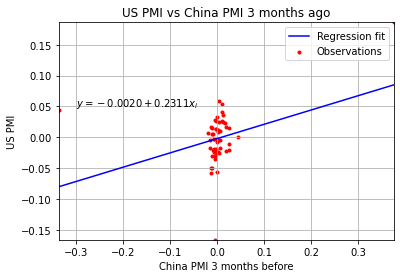

In [218]:
X_reg = np.linspace(df['China PMI'].min(), df['China PMI'].max())

y_reg = model.intercept_[0] + X_reg*model.coef_[0]

fig, ax = plt.subplots()

plt.grid(True)

plt.plot(X_reg, y_reg, 'b-', label="Regression fit")

plt.scatter(X_train, y_train, c="red", marker='.', label="Observations")




plt.xlim(df['China PMI'].min(), df['China PMI'].max())
plt.ylim(df['US PMI'].min(), df['US PMI'].max())
plt.legend()

ax.set_ylabel('US PMI')
ax.set_xlabel("China PMI 3 months before")
ax.set_title("US PMI vs China PMI 3 months ago")
ax.annotate(r'$y = %5.4f + %5.4f x_{i}$ '%(model.intercept_, model.coef_), xy=(-0.3, 0.05))

plt.savefig("images/Regression_fit.png")

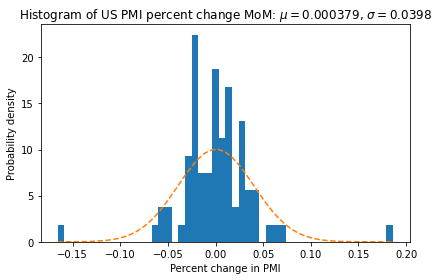

In [222]:

# example data
mu = datasets["US PMI"]["Percent change"].mean()  # mean of distribution
sigma = datasets["US PMI"]["Percent change"].std()  # standard deviation of distribution

x = datasets["US PMI"]["Percent change"]

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Percent change in PMI')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of US PMI percent change MoM: $\mu=%5.6f$, $\sigma=%5.4f$'%(mu, sigma))

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.savefig("images/distribution_US_PMI.png")
plt.show()

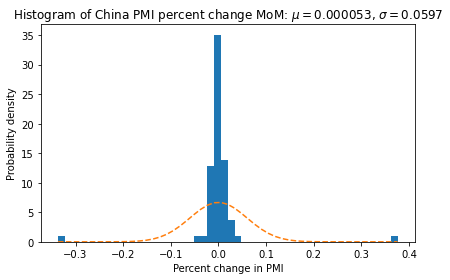

In [241]:
# example data
mu = datasets["China PMI"]["Percent change"].mean()  # mean of distribution
sigma = datasets["China PMI"]["Percent change"].std()  # standard deviation of distribution

x = datasets["China PMI"]["Percent change"]

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Percent change in PMI')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of China PMI percent change MoM: $\mu=%5.6f$, $\sigma=%5.4f$'%(mu, sigma))



# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.savefig("images/distribution_China_PMI.png")
plt.show()